# Customer Churn Prediction for Telecommunication Company using Machine Learning


---

# 1. Data Selection Reason and Problem Definition
## (1) Reason for data selection: The core of every company is "customer"
 The most important thing in any enterprise is to "gather customers" for the benefit of the company. However, acquiring new customers is costly and time consuming. In comparison, “stopping churn and retaining current customers” is a more economical and effective strategy in the long run. Therefore, **Data on customer churn, which is the biggest issue of many companies**, was analyzed.
## (2) Problem definition: "How can telecommunication companies reduce customer churn?"
## (3) Problem Approach: Classification
## (4) Data : Telco Customer Churn (from Kaggle)
- https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## (5) Data Description :

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

# 2. Hypothesis using data, evaluation index, baseline selection
## (1) Hypothesis setup
>Is there a difference in the degree of customer churn depending on gender?

>Is there a difference in the extent to which customers churn depending on the period of use?

>Is 'TotalCharges' related to 'tenure' and 'MonthlyCharges'?

## (2) Evaluation index: recall, F1 score

## (3) Baseline: Target mode
## (4) Target: Churn (whether customers churn)
## (5) Project Questions
>Q1) Explain why you specified that attribute as a target
- A1) Reason: It was specified because it is the most closely related feature to the purpose of the dataset, whether or not customers churn.

> Q2) Explain why you specified that attribute as a target
- A2)Reason: Since the target has an imbalanced distribution, it is appropriate to use the target's mode as the baseline.


# 3. EDA and Data Preprocessing
## (1) Load data

In [ ]:
!pip install eli5 
import eli5 

     |████████████████████████████████| 106 kB 4.3 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install catboost
import catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [ ]:
!pip install pdp
import pdp

  Created wheel for pdp: filename=pdp-0.3.0-py3-none-any.whl size=6618 sha256=792f8df6aa3921d6f52cea75ef21442585d3a8b3dedbeb8bc1d6eb662160653c
  Stored in directory: /root/.cache/pip/wheels/86/3f/21/790268989f0e594527d3b781d80e150499eb918f8c88c1509a
Successfully built pdp


In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import eli5 
from eli5.sklearn import PermutationImportance 
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [ ]:
from google.colab import files
myfile = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
data = pd.read_csv(io.BytesIO(myfile['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
data

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 columns]

## (2) Data Analysis
> Data columns description

1. customerID: A unique ID that identifies each customer.
2. gender: Customer's gender -> Male, Female
3. SeniorCitizen: Indicates whether the customer is 65 or older. -> Yes, No
4. Partner: Indicates whether the customer has a partner or not. -> Yes, No
5. Dependents: Indicates whether the customer lives with dependents. -> Yes, No (Dependents can be children, parents, grandparents, etc.)
6. tenure: The total number of months the customer has used the company.
7. PhoneService: Indicates whether the customer has subscribed to the company's home phone service -> Yes, No
8. MultipleLines: Indicates whether the customer has subscribed to multiple telephone lines of the company. -> Yes, No
9. InternetService: Indicates whether the customer has subscribed to the company's Internet service -> NO, DSL, Fiber Optic, Cable.
10. OnlineSecurity: Indicates whether the customer has subscribed to additional online security services provided by the company. -> Yes, No
11. OnlineBackup: Indicates whether the customer subscribes to an additional online backup service provided by the company. -> Yes, No
12. DeviceProtection: Indicates whether the customer has subscribed to an additional device protection plan for Internet equipment provided by the company. -> Yes, No
13. TechSupport: Indicates whether the customer has subscribed to the company's additional technical support plan with reduced latency. -> Yes, No
14. StreamingTV: Indicates whether the customer uses the Internet service to stream television programs from third-party providers -> Yes, No (The company does not charge extra for this service.)
15. StreamingMovies: Indicates whether the customer uses the Internet service to stream movies from third-party providers -> Yes, No (The company does not charge extra for this service.)
16. Contract: Indicates the customer's current contract type. -> Month-to-Month, One Year, Two Year.
17. PaperlessBilling : Indicates whether the customer has selected Paperless Billing -> Yes, No
18. PaymentMethod : Indicates how the customer pays the bill -> Electronic check, Bank Withdrawal, Credit Card, Mailed Check
19. MonthlyCharges: Indicates the customer's current total monthly charge for all services provided by the company.
20. TotalCharges: Displays the calculated customer's total charge.
21. Churn: Yes = The customer has left the company. No = The customer remained with the company.

## What the data tells us:
1. Demographic information about our customers, including gender and marital status;
2. Customer account information such as the number of months using the company, paperless billing, payment method, monthly usage fee, total usage fee
3. Customer usage behavior such as TV streaming and movie streaming
4. Services subscribed by the customer: phone service, multi-service, internet service, online security, online backup, device protection and technical support.
5. Whether or not each customer has churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


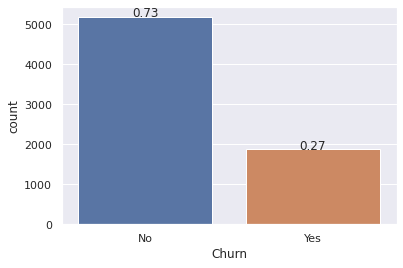

In [ ]:
# Examine the distribution of the target variable
sns.set_theme();
ac = sns.countplot(data.Churn);
for p in ac.patches:
    height = p.get_height()
    ac.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(data)),
            ha="center");

## Targets with imbalanced distribution
- The Target variable is not evenly distributed and only 26.54% of customers churn. So, when our model trains on this dataset and makes predictions, it is likely to be biased toward the majority class (in this case, non-churn customers) and ignore the minority class. Therefore, we need to balance the dataset so that the model learns and predicts biased, and treats both classes equally for better results.

## How to Unbalance with SMOTE
- There is a way to balance the target variable using SMOTE (Synthetic Minority Oversampling Technique). Once the training data is generated, it uses the SMOTE algorithm to upsample a small sample, in this case 'yes_churn' (changing customers).

## SMOTE:
1. It works by creating synthetic samples from a minor class (yes-churn) instead of making a copy.
2. Randomly choose one of the k-nearest neighbors and use it to generate new similar but randomly adjusted observations.

## Determine Baseline Model
- It is set to no churn, which is the most frequent value of the target.

## Recall and f1 score are appropriate for the evaluation index
- Accuracy should not be used as the sole indicator of imbalanced data sets. In addition, since the purpose of the business is to make a profit, it is necessary to reduce costs as much as possible.
- Therefore, it is important that FN (customers who will churn but incorrectly predict that they will not churn) is minimized. Therefore, recall is an appropriate evaluation index.
- At the same time, the f1 score is an evaluation indicator that secures the trade-off relationship between recall and precision, so we look at it together.

In [ ]:
!pip install pandas-profiling==2.11.0

from pandas_profiling import ProfileReport
profile = ProfileReport(data, minimal=True).to_notebook_iframe()

     |████████████████████████████████| 243 kB 4.2 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 3.1 MB 38.5 MB/s 
     |████████████████████████████████| 62 kB 765 kB/s 
     |████████████████████████████████| 675 kB 30.1 MB/s 
     |████████████████████████████████| 812 kB 40.0 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=01ccf7cb995d31249396e475eaaf5f2619416568f74658f6b031a1cf8cf4d8b1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=84d3d0918d02387a4943c9bea8228fa9041aa247e63d8564d6ba3f2e528afac7
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    F

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Confirm that the column called TotalChages is a string
- Check customerID column, which doesn't affect customer churn rate


In [ ]:
# View data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# View the eigenvalues ​​of the categorical columns through the function.

# This is a function to see unique values ​​in a column
def get_uniques(df, columns):
  return {column: list(df[column].unique()) for column in columns}

# This function allows you to view categorical data whose dtype is object.
def get_categorical_columns(df):
  return [column for column in df.columns if df.dtypes[column] == 'object']

In [ ]:
# This is a function to see the eigenvalues ​​of categorical data
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382.25',


In [ ]:
# Above, we confirmed that TotalCharges should be numeric but is in string.
# Re-sort the eigenvalues ​​of TotalCharges
sorted(data['TotalCharges'].unique())

# Check that there was an empty field.

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [ ]:
# Replace blanks with NaNs and check for missing values ​​again
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Change the values ​​of TotalCharges to float.
data['TotalCharges'] = data['TotalCharges'].astype(np.float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


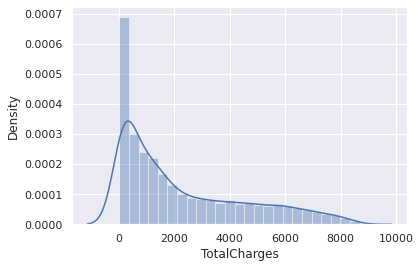

In [ ]:
sns.distplot(data['TotalCharges']);

- You can see that the distribution of the TotalCharges column is positively skewed. Therefore, the missing value is replaced with the median value.

In [ ]:
# Replace 11 missing values ​​with the median of TotalCharges
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [ ]:
# Make sure TotalCharges is no longer in the function that can look at the eigenvalues ​​of categorical data
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'customerID': ['7590-VHVEG',
  '5575-GNVDE',
  '3668-QPYBK',
  '7795-CFOCW',
  '9237-HQITU',
  '9305-CDSKC',
  '1452-KIOVK',
  '6713-OKOMC',
  '7892-POOKP',
  '6388-TABGU',
  '9763-GRSKD',
  '7469-LKBCI',
  '8091-TTVAX',
  '0280-XJGEX

In [ ]:
# Check for duplicate values ​​in the data.
print('중복값의 수 :  ', data.customerID.duplicated().sum())

중복값의 수 :   0


In [ ]:
# Delete unnecessary column customerID
# Because this data does not affect whether a customer churns or not.
data = data.drop('customerID', axis=1)

In [ ]:
# Let's sort out the eigenvalues ​​of the columns.
# No phone service == No, so change it
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

# No internet service == No, so change it
data[['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 
     'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 
                                                             'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
# A function that allows you to view the eigenvalues ​​of categorical data. Confirm that the eigenvalues ​​are set to yes or no.
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'gender': ['Female', 'Male']}

In [ ]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

- On average, you pay $64.76 for the service per month, with the highest monthly fee being $118.75.
- The cheapest monthly plan is $18.25.

## (3) Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

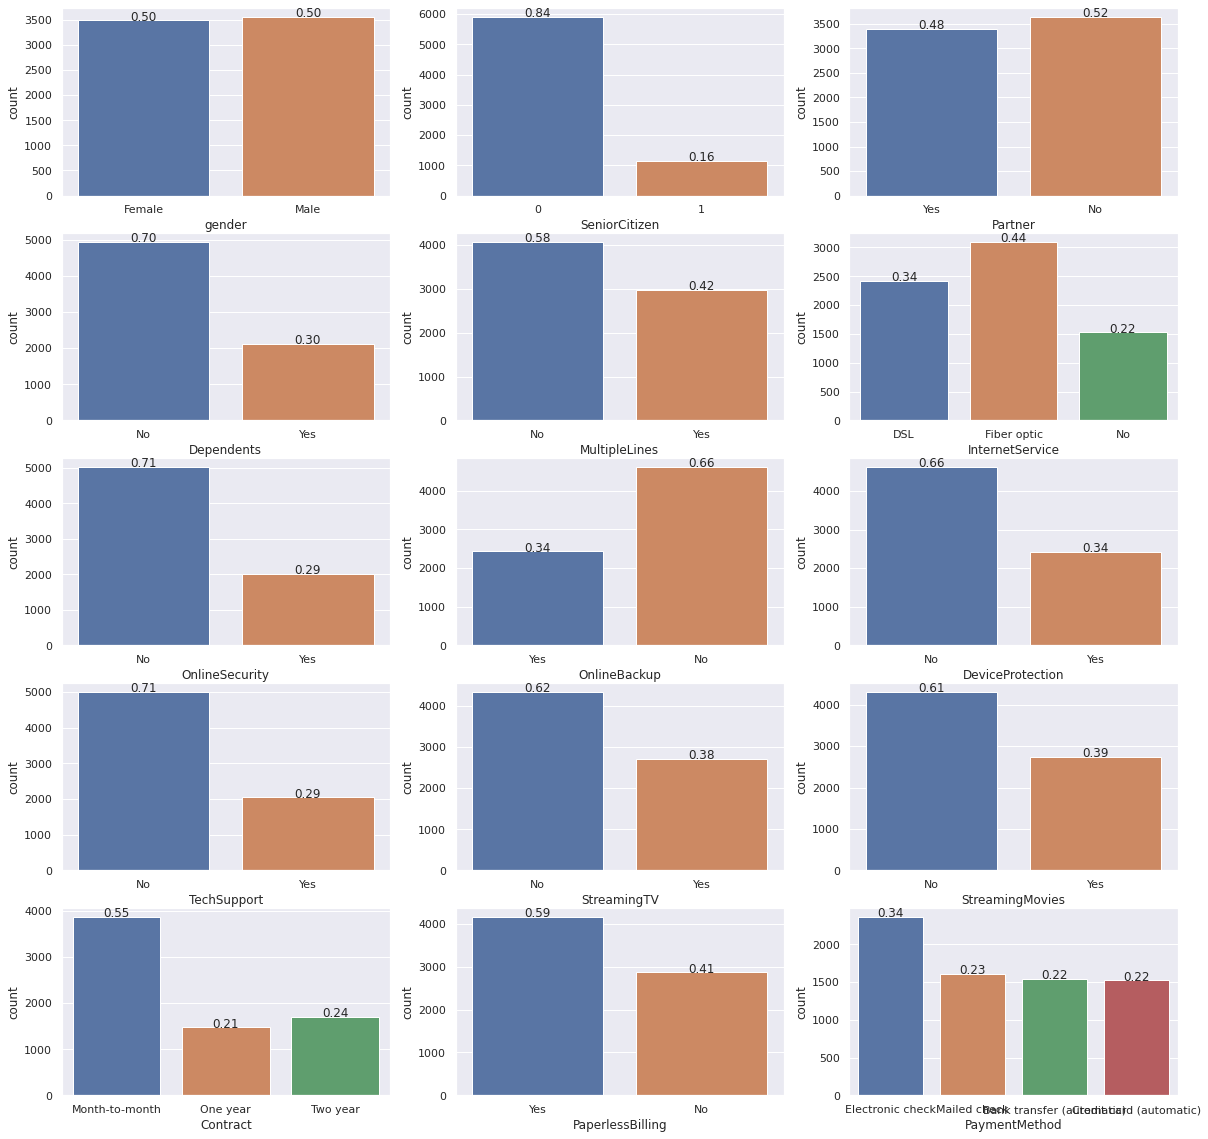

In [ ]:
### Countplots for categorical features ###
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
fig,ax = plt.subplots(5,3,figsize=(20,20))
sns.set_style("dark")
categorical = ["gender","SeniorCitizen","Partner","Dependents","MultipleLines","InternetService",\
               "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",\
               "Contract","PaperlessBilling","PaymentMethod","PhoneService","Churn"]
k = 0
for i in range(5):
    for j in range(3):
        ac = sns.countplot(data[categorical[k]],ax=ax[i][j])
        for p in ac.patches:
            height = p.get_height()
            ac.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(data)),
                    ha="center") 
        k+=1

- The ratio of men to women in 'gender' is about the same.
- In 'Partner', the ratio of having a partner and not having a partner is almost the same.

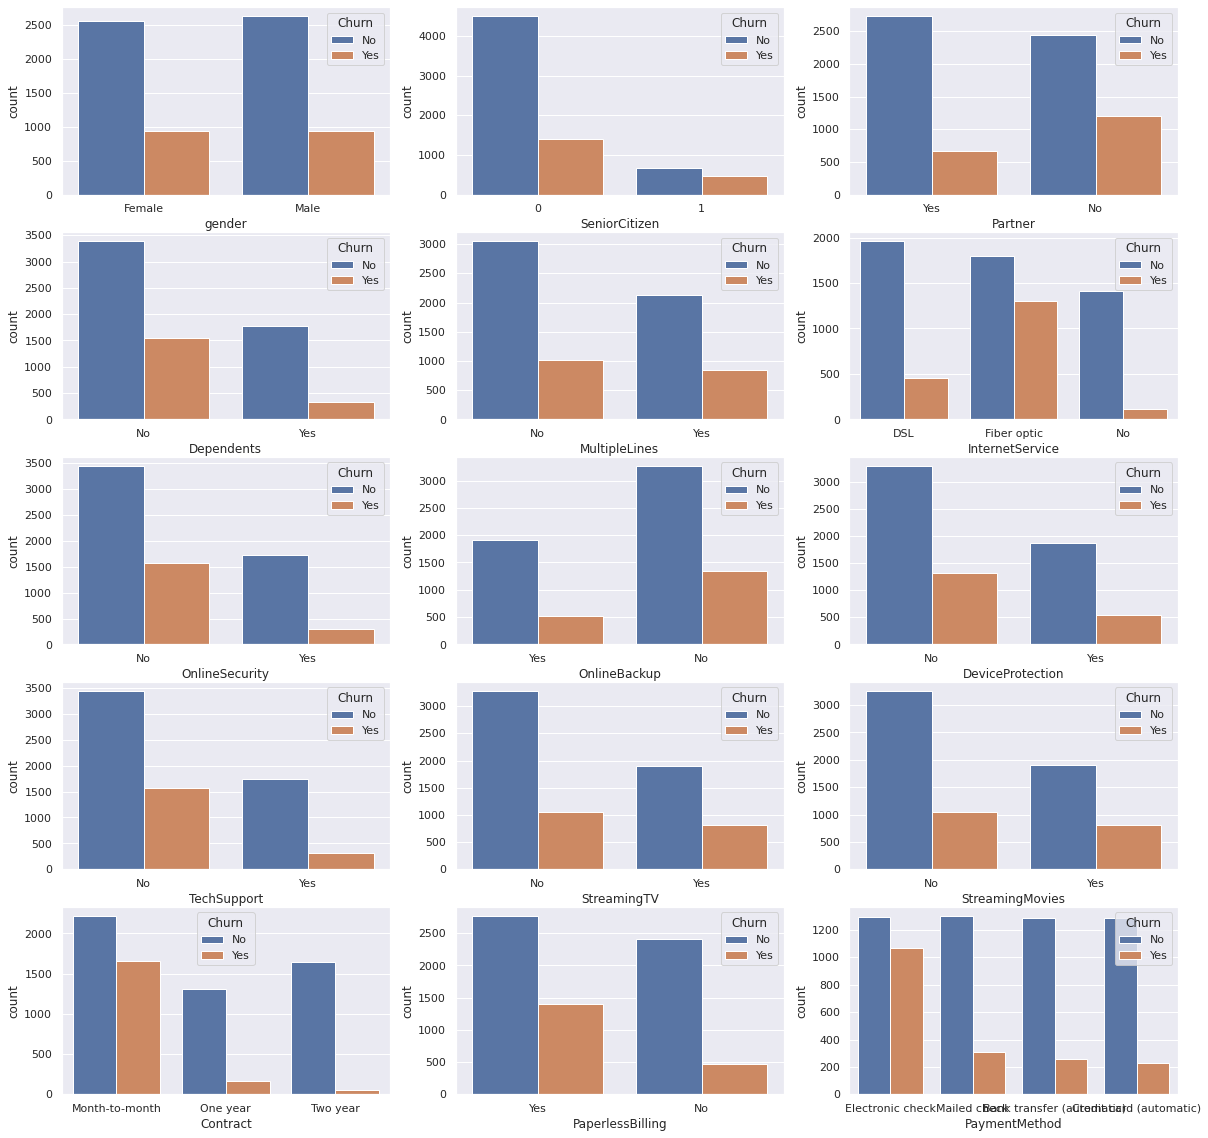

In [ ]:
# Visualization by column according to customer attrition
sns.set_theme()
fig,ax = plt.subplots(5,3,figsize=(20,20))
sns.set_style("dark")
k = 0
for i in range(5):
    for j in range(3):
        ac = sns.countplot(data = data,x=data[categorical[k]],hue="Churn",ax=ax[i][j])
         
        k+=1

- Gender: There is little difference between male and female churn rates. Therefore, it can be concluded that "there is no difference" in the hypothesis "Is there a difference in the degree of customer churn according to gender?"
- Seniors: The churn rate of senior customers is over 40%, which indicates that they are likely to leave the group.
- Partners: Single customers are more likely to churn than customers with partners.
- Dependents: Customers with dependents are less likely to churn than customers without dependents.
- The dropout rate for fiber optic is much higher in internet service (compared to 'DSL', 'No')
- High bounce rates when not using support services like OnlineSecurity, TechSupport, etc.
- Enabling and disabling some services like MultipleLines, StreamingTV, StreamingMovies seems to have about the same effect on Churn.

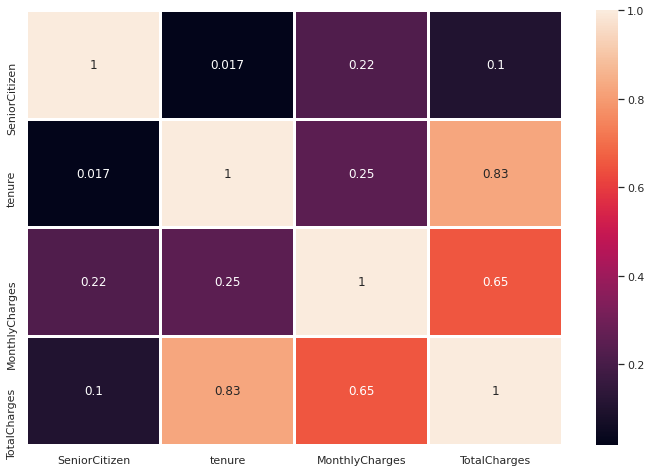

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, linewidths = 2)
plt.show()


- As can be seen in the heat map, there is a high correlation between 'tenure' and 'TotalCharges'.
Another notable correlation is between 'MonthlyCharges' and 'TotalCharges'.
- This supports the hypothesis that 'TotalCharges' is the product of 'tenure' and 'MonthlyCharges' (+tax, etc.).

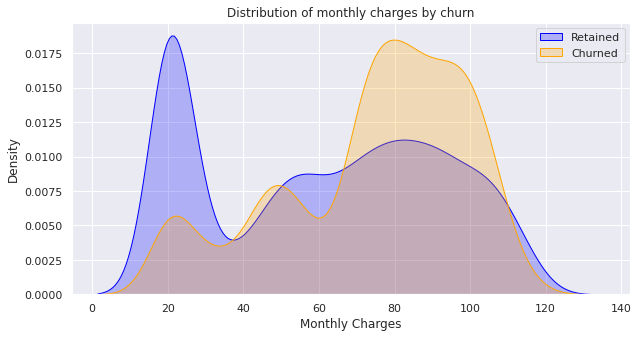

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

You can see that many of the customers who churn (Churend) are paying more than 60 dollars per month in monthly rates, while the most popular group of monthly rates in retained customers (Retained) are spending around $20 per month.

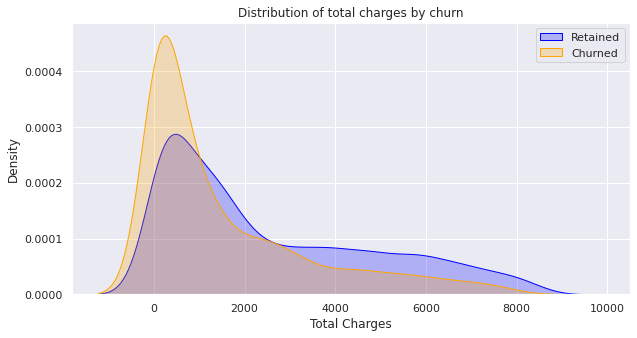

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')
plt.show()

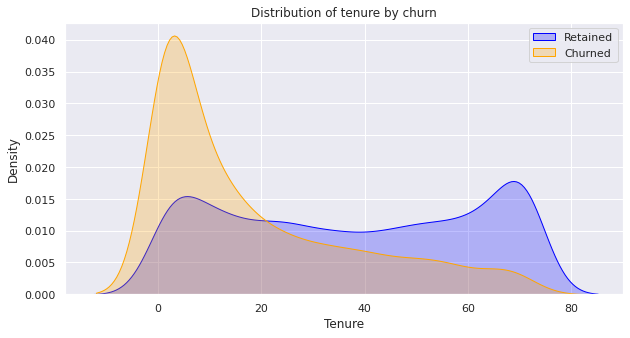

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')
plt.show()

- Customers with tenure less than about 10 months churn significantly more. Those with tenure over 60 months retain more.

## (4) Encoding


In [ ]:
# Split features into 3 types (to encode each differently)
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Classify PaymentMethod as nominal because there is no order
nominal_features = ['PaymentMethod', 'InternetService', 'Contract']

target_column = 'Churn'

In [ ]:
# binary features encoding function
def binary_encode(df, column, positive_value):
  df = df.copy()
  df[column] = df[column].apply(lambda x : 1 if x == positive_value else 0)
  return df

# nominal features encoding function
def onehot_encode(df, column):
  df = df.copy()
  dummies = pd.get_dummies(df[column])
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(column, axis = 1)
  return df


In [ ]:
# apply the encoding functions defined above
data = binary_encode(data, 'gender', 'Male')

yes_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for feature in yes_features: 
  data = binary_encode(data, feature, 'Yes')

data = onehot_encode(data, 'PaymentMethod')
data = onehot_encode(data, 'InternetService')
data = onehot_encode(data, 'Contract')

In [ ]:
# Encode target column churn
data = binary_encode(data, 'Churn', 'Yes')

In [ ]:
data.head()

gender  SeniorCitizen  Partner  ...  Month-to-month  One year  Two year
0       0              0        1  ...               1         0         0
1       1              0        0  ...               0         1         0
2       1              0        0  ...               1         0         0
3       1              0        0  ...               0         1         0
4       0              0        0  ...               1         0         0

[5 rows x 27 columns]

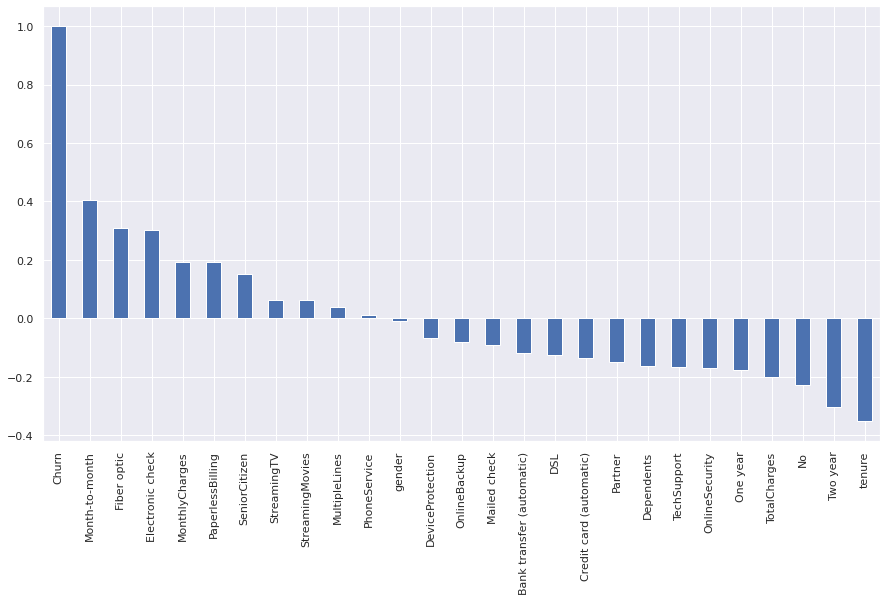

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- The graph above shows the correlation between the target and the features. This shows that month-to-month is the one that has the most impact on the target. And it can be seen that the impact of features less than gender on the target is less than 0.

### (5) Project Questions
- Data Leakage: As of now, it can be seen that no data leak has occurred.
- Limitations of the model: To see the performance of all characteristics, we did not drop the characteristics separately. So there is a risk of overfitting.

# 4. Application of machine learning method and cross-validation

In [ ]:
# scale the data
cols_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
# Divide the data into train, validation, and test.
target = 'Churn'
train, test = train_test_split(data,test_size=0.2)
train, val = train_test_split(train,test_size=0.2)

train.shape , val.shape , test.shape

((4507, 27), (1127, 27), (1409, 27))

In [ ]:
target = 'Churn'

X = lambda df:df.drop(target,axis=1)
y = lambda df:df[target]

In [ ]:
X_train,y_train = X(train),y(train)
X_val,y_val = X(val),y(val)
X_test,y_test = X(test),y(test)

## (1) Modeling


### Logistic Regression


---



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000,random_state=4)
logistic.fit(X_train, y_train)
logistic.score(X_val, y_val)

0.805678793256433

### Decision Tree


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=4, criterion='entropy')
decision_tree.fit(X_train,y_train)
decision_tree.score(X_val,y_val)

0.7444543034605147

### Random Forest


---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_jobs=-1, random_state=4, oob_score=True)
random_forest.fit(X_train,y_train)
random_forest.score(X_val,y_val)

0.8047914818101154

### Xgboost


---



In [ ]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.01, random_state=0, scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(X_train, y_train);
xgb_clf.score(X_val, y_val)

0.7391304347826086

### Cat Boost


---



In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier( auto_class_weights='Balanced')
catboost_clf.fit(X_train, y_train)
catboost_clf.score(X_val, y_val)

Learning rate set to 0.019595
0:	learn: 0.6846080	total: 52.6ms	remaining: 52.6s
1:	learn: 0.6762360	total: 56.4ms	remaining: 28.2s
2:	learn: 0.6681874	total: 60.2ms	remaining: 20s
3:	learn: 0.6607553	total: 64ms	remaining: 15.9s
4:	learn: 0.6540027	total: 67.8ms	remaining: 13.5s
5:	learn: 0.6464341	total: 71.6ms	remaining: 11.9s
6:	learn: 0.6397456	total: 75.4ms	remaining: 10.7s
7:	learn: 0.6332270	total: 79.2ms	remaining: 9.82s
8:	learn: 0.6269145	total: 82.9ms	remaining: 9.13s
9:	learn: 0.6205490	total: 86.8ms	remaining: 8.59s
10:	learn: 0.6162113	total: 94.1ms	remaining: 8.46s
11:	learn: 0.6127437	total: 98.1ms	remaining: 8.07s
12:	learn: 0.6075631	total: 102ms	remaining: 7.74s
13:	learn: 0.6029549	total: 106ms	remaining: 7.48s
14:	learn: 0.5988311	total: 110ms	remaining: 7.23s
15:	learn: 0.5943723	total: 114ms	remaining: 7.01s
16:	learn: 0.5908156	total: 118ms	remaining: 6.82s
17:	learn: 0.5872099	total: 122ms	remaining: 6.66s
18:	learn: 0.5829777	total: 126ms	remaining: 6.5s
19:	

0.7613132209405501

### KNN(k-nearest neighbor)


---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_val, y_val)

0.7320319432120674

The logistic model and the random forest model with high scores are selected as final model candidates.

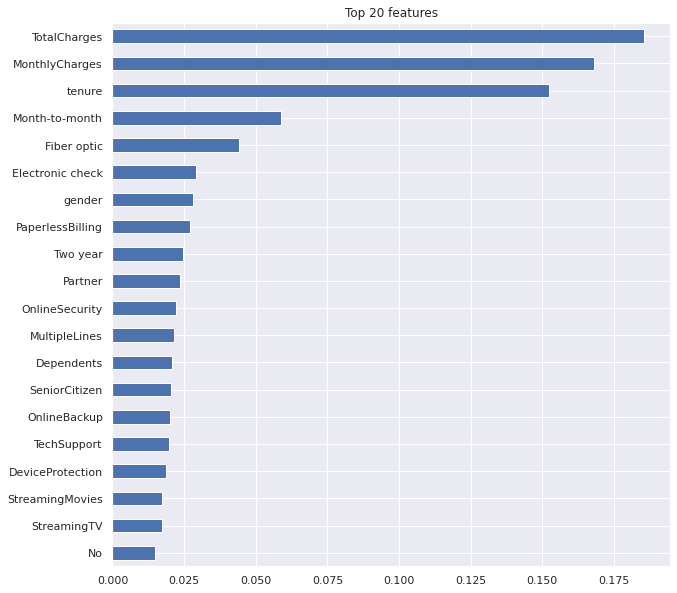

In [ ]:
importances = pd.Series(random_forest.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

## Hyperparameter tuning


The validation set and the training set are combined and classified into train and test only.

In [ ]:
X_train = pd.concat([X_train,X_val])
y_train = pd.concat([y_train,y_val])
X_train.shape , y_train.shape

((5634, 26), (5634,))

### Logistic Regression


---



Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 677 out of 680 | elapsed:   36.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed:   36.3s finished


<Figure size 576x360 with 0 Axes>

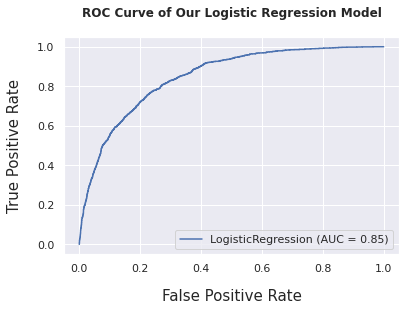

최적 하이퍼파라미터:  {'max_iter': 1000, 'class_weight': 'l', 'C': 20}
Recall :  0.5498017664653762


In [ ]:
# Import packages
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randfloat 
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold


dists = {
    'C': list(range(10,100,10))+[0.001,0.1,1,10,1000], 
    'class_weight': 'balanced',
    'max_iter':(50,500,1000,2000,3000),
}

logistic_clf = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

logistic_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(logistic_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', logistic_clf.best_params_)
print('Recall : ', logistic_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed:   33.6s finished


<Figure size 576x360 with 0 Axes>

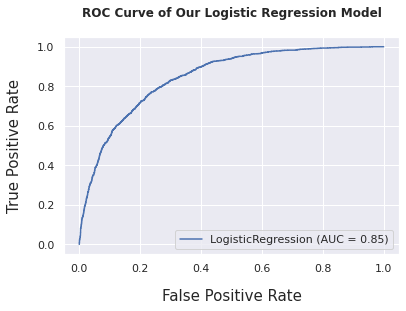

최적 하이퍼파라미터:  {'max_iter': 2000, 'class_weight': 'd', 'C': 1}
F1 score :  0.5982833158658629


In [ ]:
dists = {
    'C': list(range(10,100,10))+[0.001,0.1,1,10,1000], 
    'class_weight': 'balanced',
    'max_iter':(50,500,1000,2000,3000),
}

logistic_clf = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

logistic_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(logistic_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', logistic_clf.best_params_)
print('F1 score : ', logistic_clf.best_score_)

### RandomForest


---



Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 23.9min finished


<Figure size 576x360 with 0 Axes>

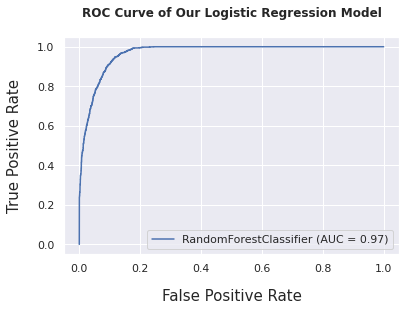

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.4272451774181959, 'n_estimators': 280}
Recall :  0.5265639990970146


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor



pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('Recall : ', forest_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 23.2min finished


<Figure size 576x360 with 0 Axes>

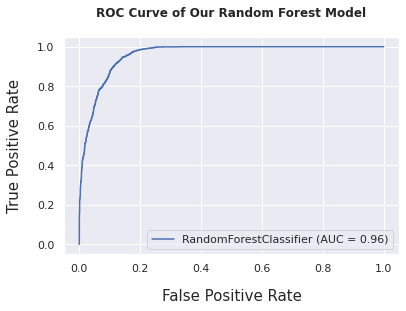

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.302278080625234, 'n_estimators': 235}
F1 score :  0.586268389781788


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('F1 score : ', forest_clf.best_score_)

### SMOTE RandomForest 
*SMOTE == Synthetic Minority Oversampling TEchnique 
- Pick a point at random from the minority group.
- Compute the k-nearest neighbors (for some prespecified k) for this point.
—Adds k new points between the selected point and each adjacent point.

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split( X1, y1, test_size=0.33, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 28.8min finished


<Figure size 576x360 with 0 Axes>

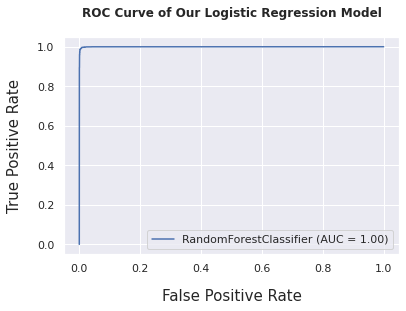

최적 하이퍼파라미터:  {'max_depth': 20, 'max_features': 0.04756877283534289, 'n_estimators': 309}
F1 score :  0.8459377220756519


In [ ]:
pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train_smote, y_train_smote);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train_smote, y_train_smote)
plt.title('ROC Curve of Our Smote Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('F1 score : ', forest_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 27.0min finished


<Figure size 576x360 with 0 Axes>

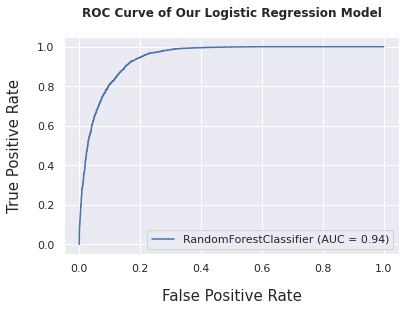

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.07124430684113836, 'n_estimators': 394}
Recall :  0.8748551564310544


In [ ]:
pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train_smote, y_train_smote);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train_smote, y_train_smote)
plt.title('ROC Curve of Our Smote Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('Recall : ', forest_clf.best_score_)

### test score of the final model (recall)
The random forest model with high recall and f1 score is the final model.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

random_forest = forest_clf.best_estimator_
logistic = logistic_clf.best_estimator_

random_forest_pred = random_forest.predict(X_test)
random_forest_pred1 = random_forest.predict(X_test_smote)
logistic_pred = logistic.predict(X_test)

random_forest_accuracy = accuracy_score(y_test,random_forest_pred)
smote_random_forest_accuracy = accuracy_score(y_test_smote,random_forest_pred1)
logistic_accuracy = accuracy_score(y_test,logistic_pred)

random_forest_recall = recall_score(y_test,random_forest_pred)
smote_random_forest_recall = recall_score(y_test_smote,random_forest_pred1)
logistic_recall = recall_score(y_test,logistic_pred)

random_forest_f1 = f1_score(y_test,random_forest_pred)
smote_random_forest_f1 = f1_score(y_test_smote,random_forest_pred1)
logistic_f1 = f1_score(y_test,logistic_pred)

print(f'Random Forest Accuracy:{random_forest_accuracy:.4f} ,Smote Random Forest Accuracy:{smote_random_forest_accuracy:.4f}, Logistic Accuracy:{logistic_accuracy:.4f}')
print(f'Random Forest Recall:{random_forest_recall:.4f} , Smote Random Forest Recall:{smote_random_forest_recall:.4f}, Logistic Recall:{logistic_recall:.4f}')
print(f'Random Forest f1:{random_forest_f1:.4f} , Smote Random Forest f1:{smote_random_forest_f1:.4f}, Logistic f1:{logistic_f1:.4f}')

Random Forest Accuracy:0.8105 ,Smote Random Forest Accuracy:0.8269, Logistic Accuracy:0.7935
Random Forest Recall:0.8385 , Smote Random Forest Recall:0.8885, Logistic Recall:0.5156
Random Forest f1:0.7069 , Smote Random Forest f1:0.8381, Logistic f1:0.5764


### Compared to the baseline model

The trained model shows significantly higher accuracy than the BaseLine model.

In [ ]:
baseline = [ 0 for _ in range(len(y_test)) ]
accuracy_score(y_test,baseline)

0.7423704755145494

### Project Questions
- All have higher accuracy values ​​than the baseline model's accuracy of 0.74.
- SMOTE sampling method was used to improve model performance. This is because the target values ​​were unbalanced.
- The final model was determined as a random forest. (Random forest using SMOTE takes too much training time, so I decided not to select it this time. Considering that there are limitations in time and cost in the actual field, I thought this was a case that could be sufficient.)

# 5. Interpreting machine learning models

## (1) Permutation Importance


In [ ]:
import warnings 
warnings.filterwarnings("ignore")

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# 1. Permutation Importances
permuter = PermutationImportance(
    forest_clf, 
    scoring='recall', 
    n_iter=5, 
    random_state=42
)

# permutor 에 fit 하기
permuter.fit(X_test,y_test)

# 특성 중요도 담기
feature_names = X_test.columns.tolist()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names)

- You can see that most of the features affect the target.
- In particular, it can be seen that Month-to-month (Contract), tenure, Fiber optic (InternetService), and MonthlyCHarges have a great impact on the target.

## (2) PDP

In [ ]:
!pip install pdpbox
import pdpbox

     |████████████████████████████████| 34.0 MB 39 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=64f69e65d5c2a50e968da5964b622377fc9826f44d75d049954b9d3c6157833b
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.11.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# You can adjust the image quality by adjusting the dpi (dots per inch) value
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [ ]:
from pdpbox.pdp import pdp_isolate 
from pdpbox.pdp import pdp_plot

In [ ]:
def pdp(feature):
    isolated = pdp_isolate(
        model= forest_clf, 
        dataset=X_test, 
        model_features=X_test.columns, 
        feature=feature,
    )
    pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


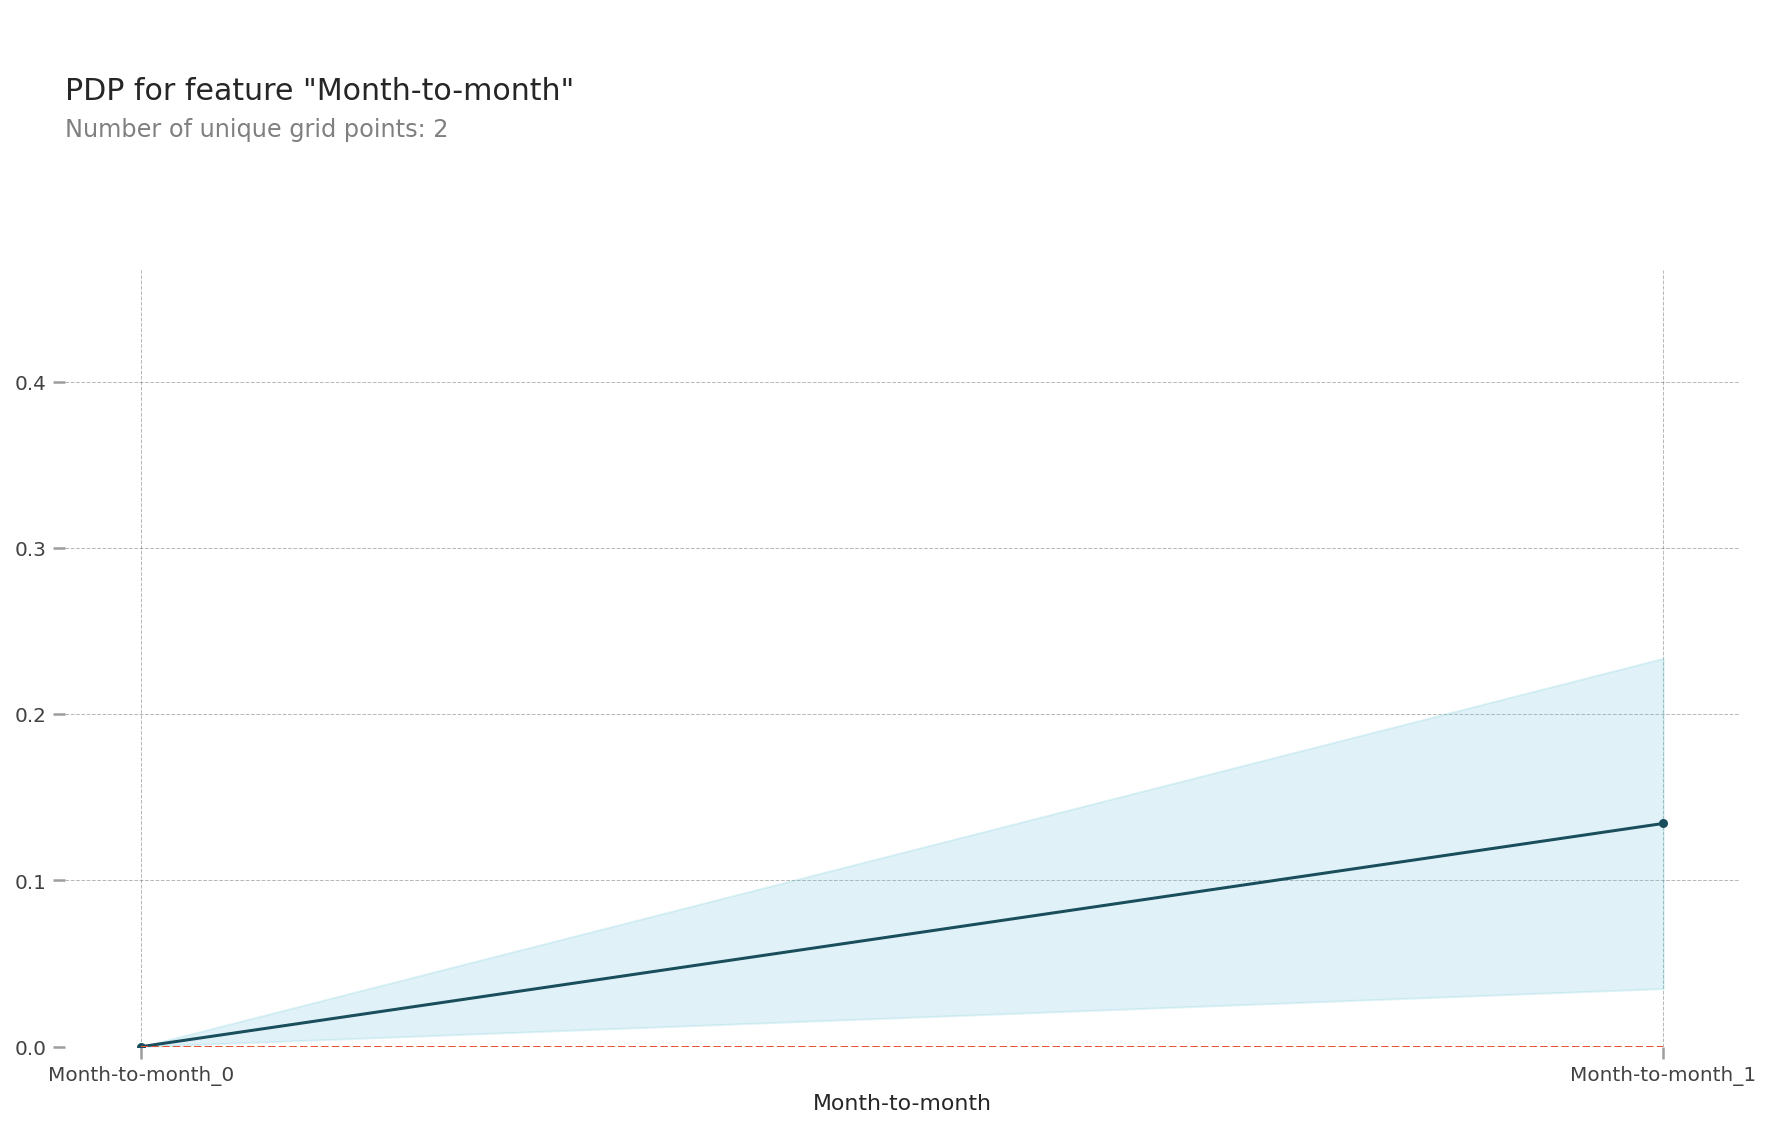

In [ ]:
pdp('Month-to-month');

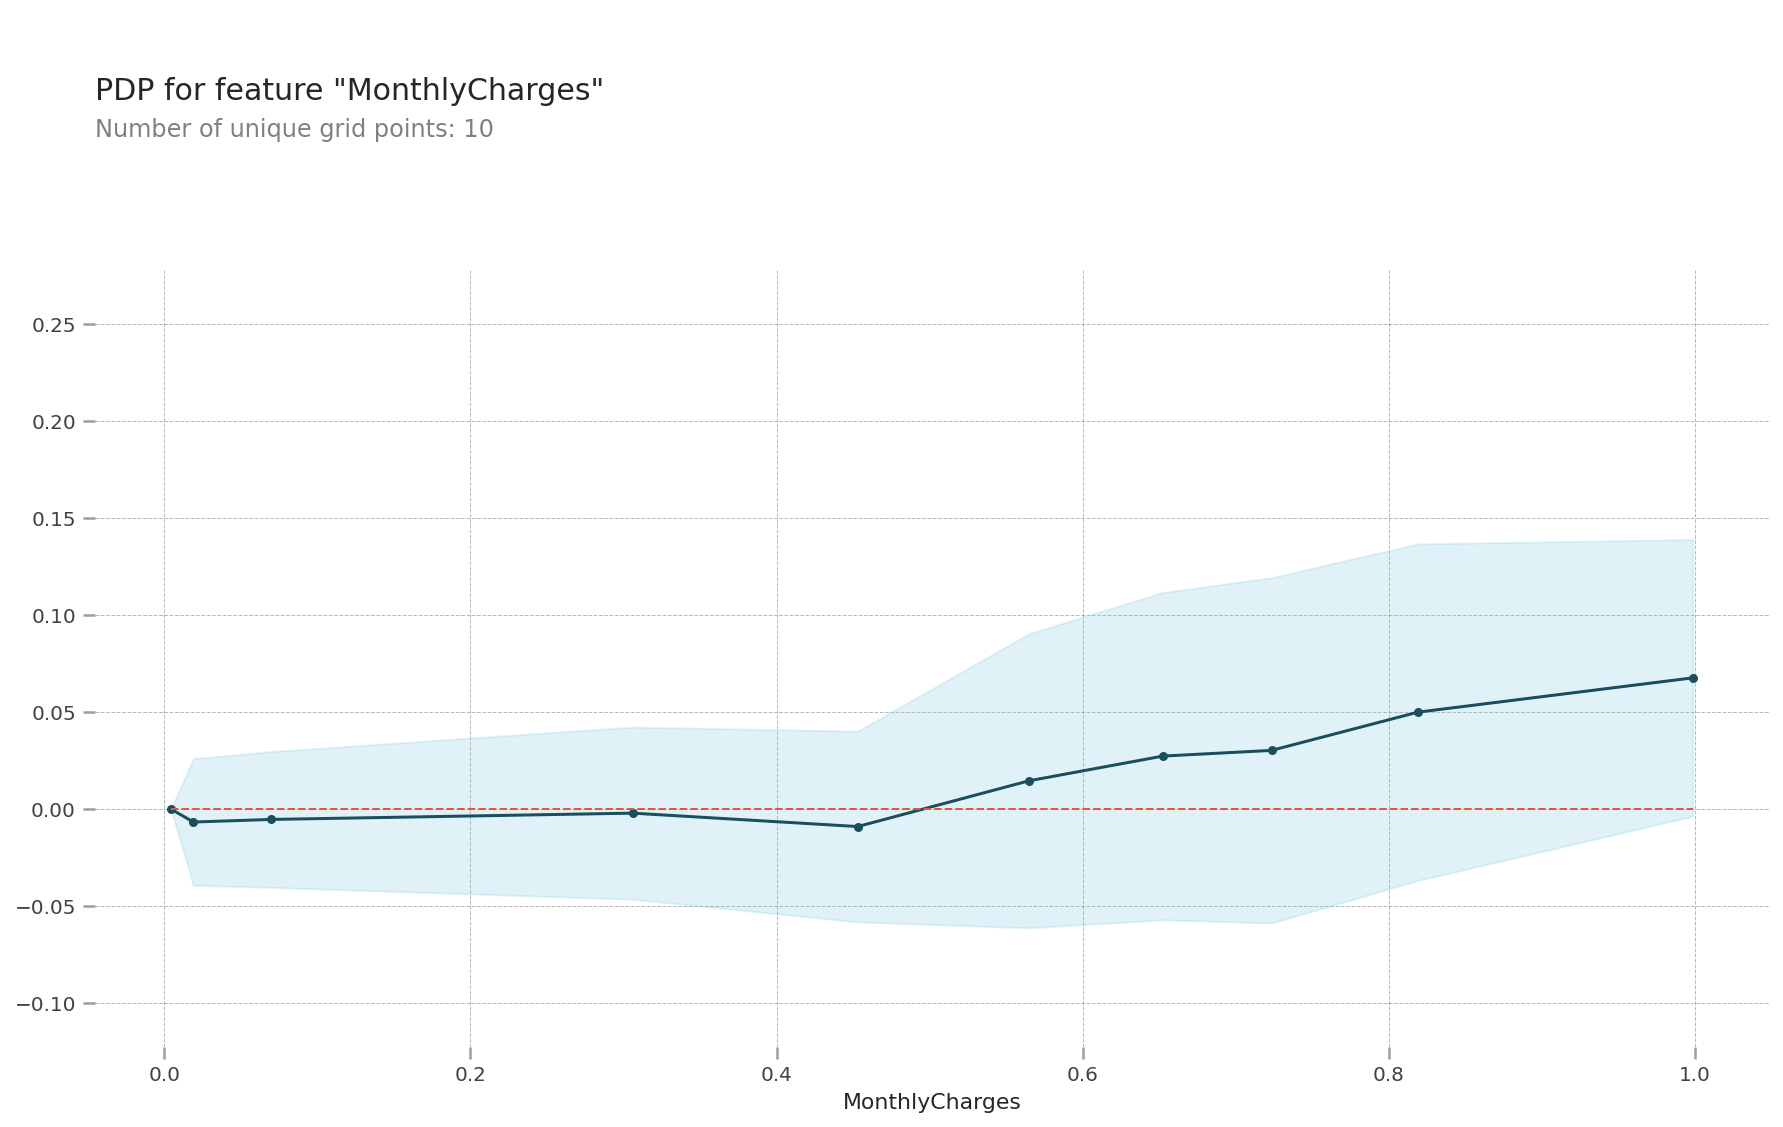

In [ ]:
pdp('MonthlyCharges');

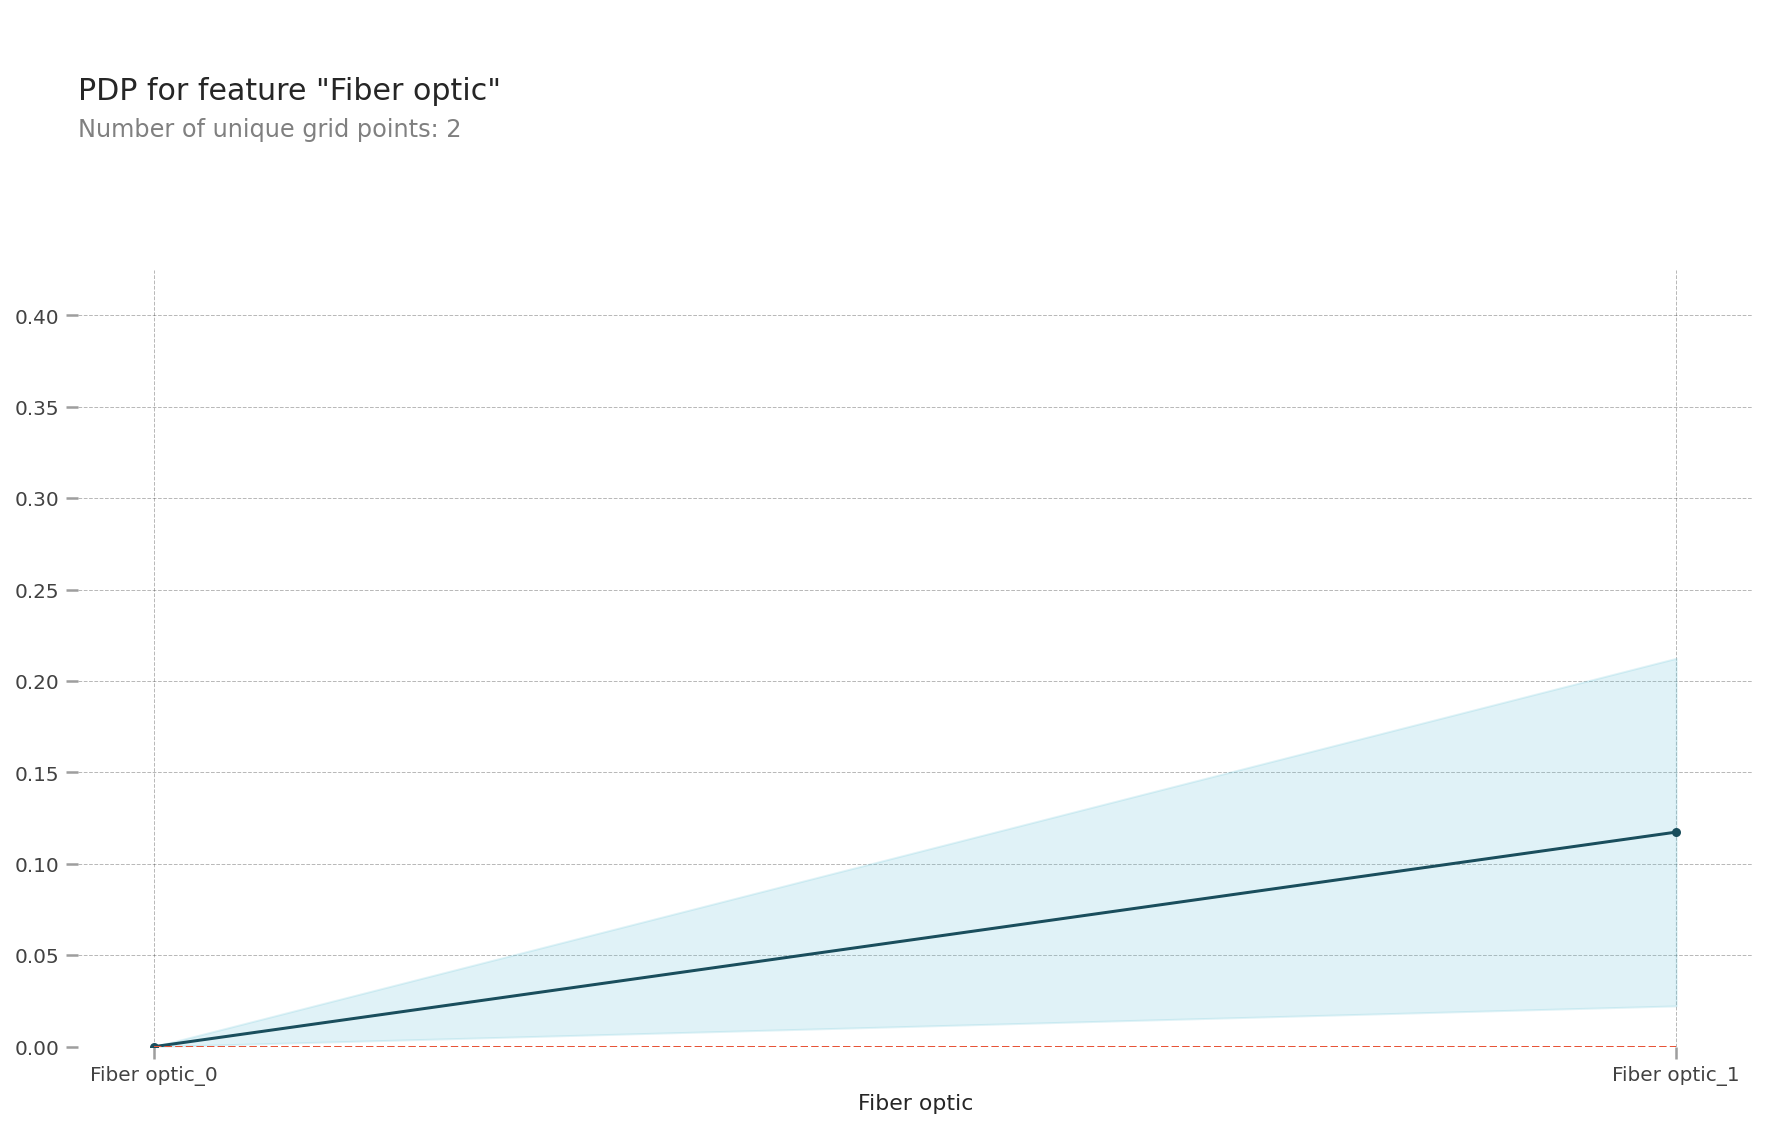

In [ ]:
pdp('Fiber optic');

- In the permutation imporatance, the three features that had a great impact on the target were shown in the pdp plot.
- By changing the characteristics linearly, you can see the increase or decrease of the target according to the characteristics at a glance.
- Month-to-month, Monthly Charges, and Fiber optic are all affecting the characteristics as each characteristic increases.

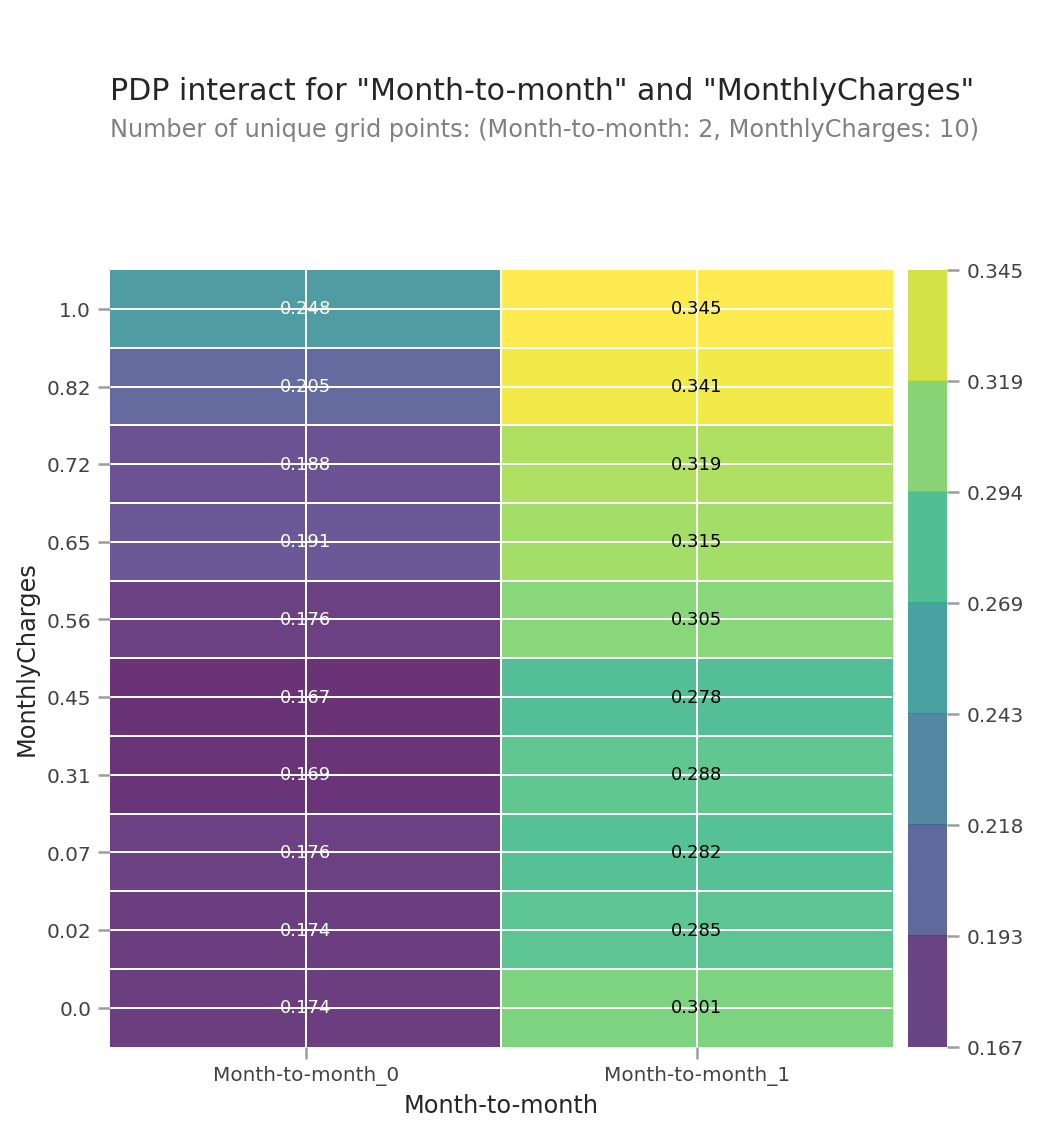

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Month-to-month', 'MonthlyCharges']

interaction = pdp_interact(
    model= forest_clf, 
    dataset=X_test,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- Shows the relationship between Month-to-month and MonthlyCharges with pdp interaction.
- Month-to-month has a great effect on the model when MonthlyCharges is large.
- In other words, Month-to-Month customers tend to churn when MonthlyCharges are high.

## (3) Shap

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=86e16c95e36243c9f375e73887dcde637a8003ce6936c25f3a1397bc7fda0bc9
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

- shap makes a model that looks like a black box transparent, visually showing which features in it affect the predicted value in which direction.
- It differs from pdp plot and feature importance in that it describes only one data sample.
- With various shape plots, you can check how each characteristic affects a certain value range.

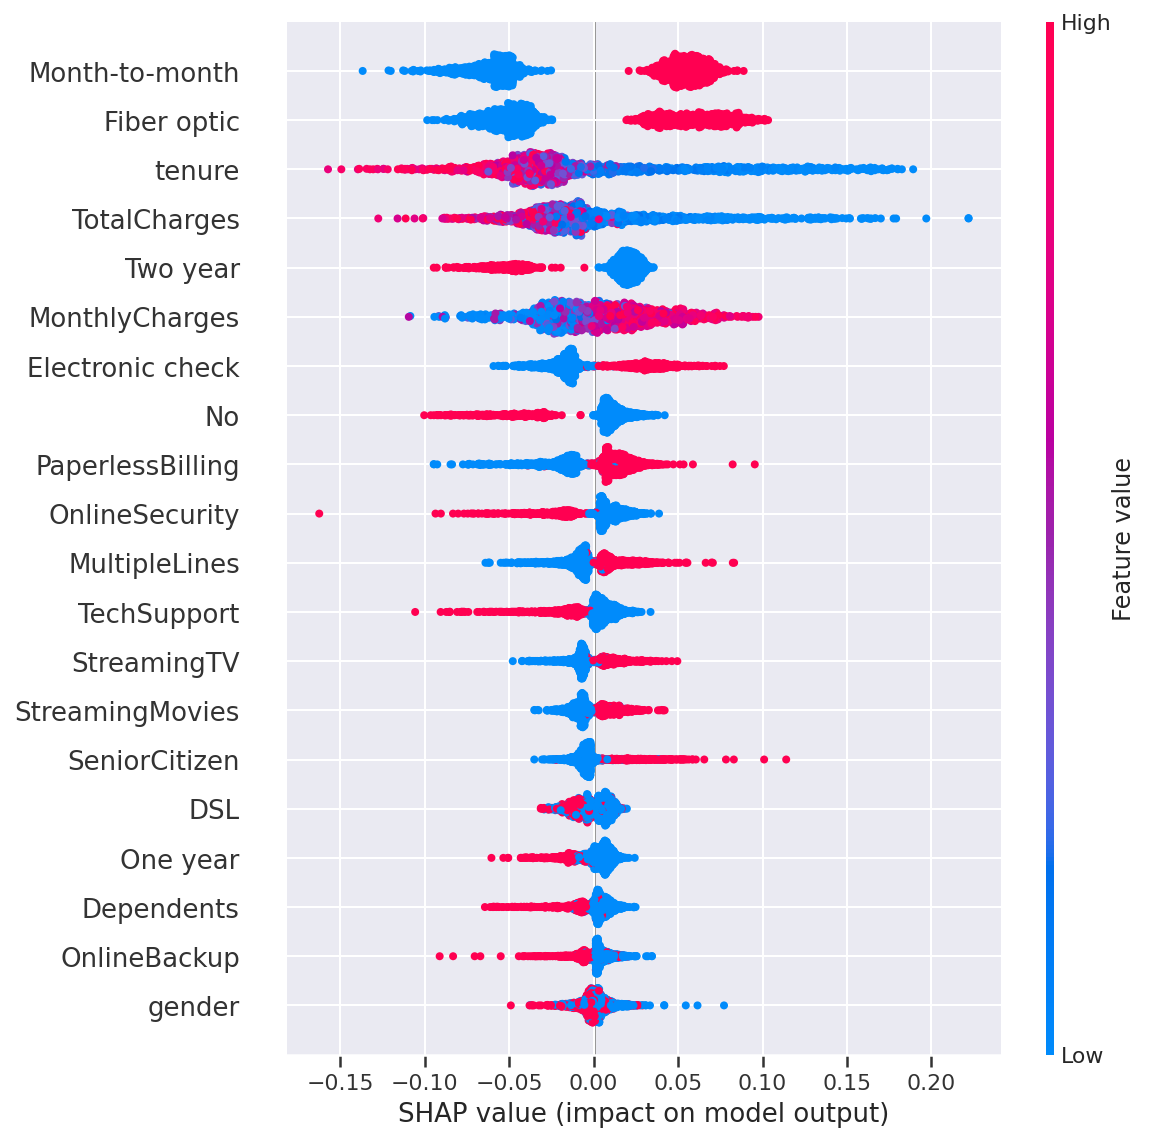

In [ ]:
shap.summary_plot(shap_values[1], X_test)

- Use the shap summary plot to see at a glance how all features affect the model.
- Red means that the value of the characteristic itself is large, and blue means that the value of the characteristic itself is small.
- In the case of tenure and totalcharges, you can see a large variance.
- Dots on the graph mean outliers.

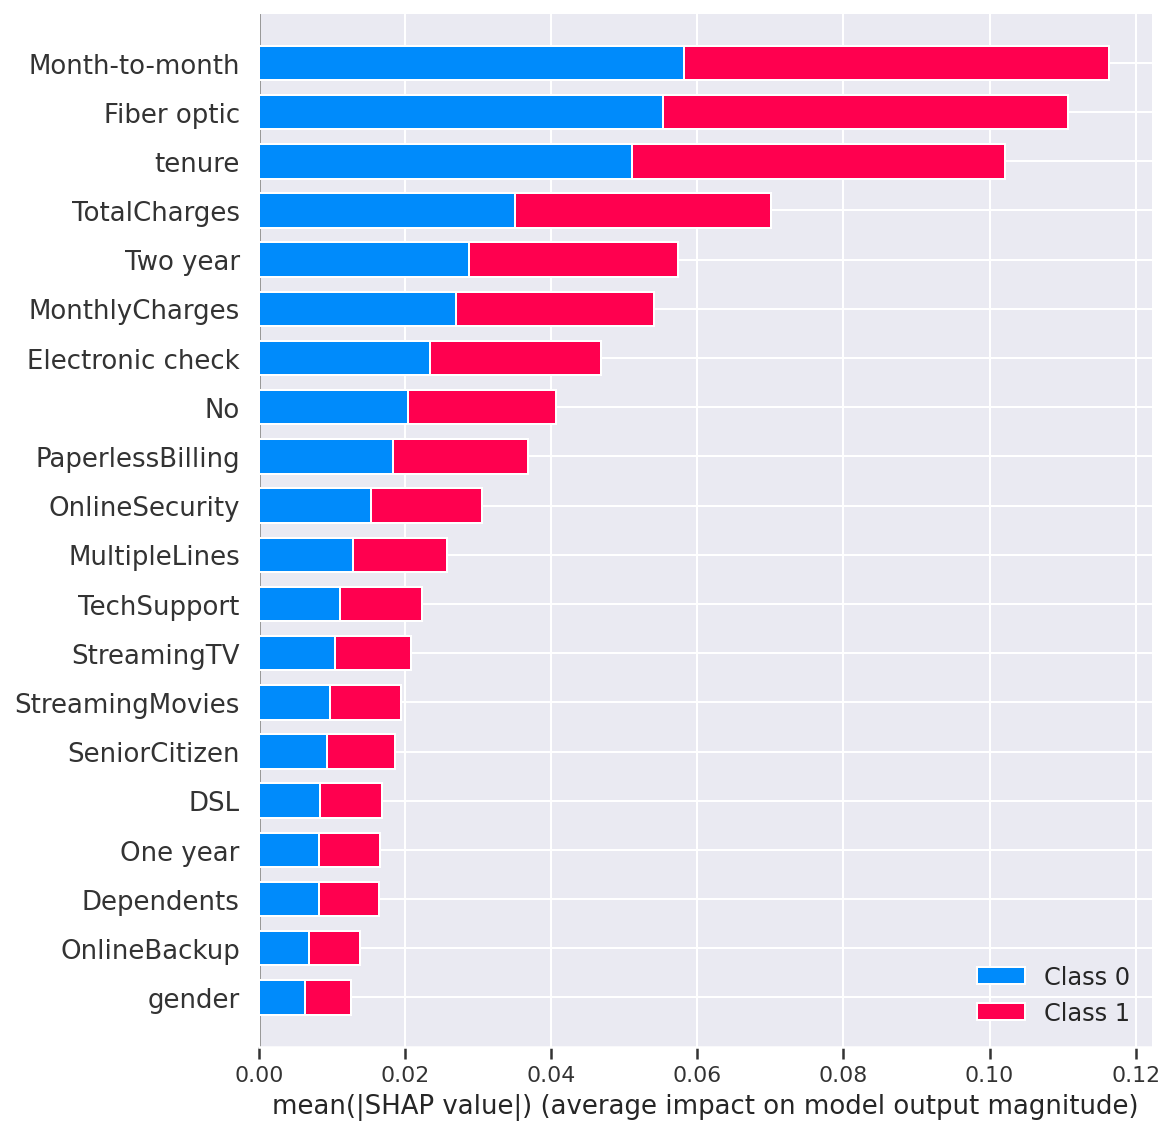

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

- A shap bar plot allows you to evaluate the influence of characteristics as a whole and see them at a glance.
- It looks similar to feature importance, but shap is more accurate as it includes negative ranges.

# 6. Conclusion
### (1) Hypothesis verification:
- Is there a difference in the degree of customer churn according to gender?
###### => There was no difference in the degree of customer churn according to gender.
- Is there a difference in the extent to which customers churn depending on the period of use?
###### => Customers with tenure less than about 10 months churn significantly more. Those with tenure over 60 months retain more. Therefore, there is a difference in the extent to which customers churn depending on the period of use.
- Is 'TotalCharges' related to 'tenure' and 'MonthlyCharges'?
###### => TotalCharges showed a high correlation with tenure and MonthlyCharges. So the three are correlated (correlation heatmap).

### (2) Problem definition: "How can telecommunication companies reduce customer churn?"

### (3) Solution:
1. Marketing products with low monthly charges to customers with monthly contracts so that they do not churn. Month-to-month customers are important customers who have a high frequency of churn and at the same time have a significant impact on the target of churn. They tend to churn if your Monthly Charges are high, so marketing products with low monthly charges can turn them into long-term customers.
2. You need to take over the Fiber optic service, which is one of the InternetServices. Fiber optic is one of the characteristics that has a big impact on the target, because most of the customers who lost through countplot were using fiber optic. Therefore, by conducting a survey to see if there is a problem with the service and providing a negative experience to the customer, and fixing that part, you can prevent the customer from leaving.

### (4) Limitations of data
- There is no data related to time or quarter in the data. Therefore, in the customer churn issue where you need to read the flow and trend at the time, this data is limited in making a perfect strategy.
- Therefore, if it was possible to know when and during what period, such as each customer's quarter or time, it would have been possible to devise a more accurate strategy for the next quarter.

### (5) Project Questions
- What features did the model use to predict observations?
###### We used all features to see the performance of all features in the model.
- What characteristics would help the model make predictions? How can I get that attribute?
###### As mentioned in the data limits above, hourly and quarterly customer churn data can be of great help when predicting customer churn for the next quarter. These characteristics are available from internal sources for each company.